In [1]:
import pandas as pd
import seaborn as sns

It's possible to pass in Matplotlib keywords, as Seaborn is built on top of Matplotlib and will just pass the parameters to the underlying Matplotlib object that's created internally

sns.despine removes top and right border

In [2]:
housing_raw = pd.read_csv(
    "Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

ca_housing = housing_raw.loc[
    (housing_raw["region_name"].str.contains("CA"))
].assign(region_name = housing_raw["region_name"].str[0:-11])

In [3]:
ca_housing_pivot = (ca_housing
                    .pivot_table(
                        index="period_begin",
                        columns="region_name",
                        values="median_active_list_price")
                    .loc[:,
                         ["San Francisco",
                          "Los Angeles",
                          "San Diego",
                          "Tulare"]
                    ]
                    .assign(overall_avg = lambda x: x.mean(axis=1))
)

# Line Charts

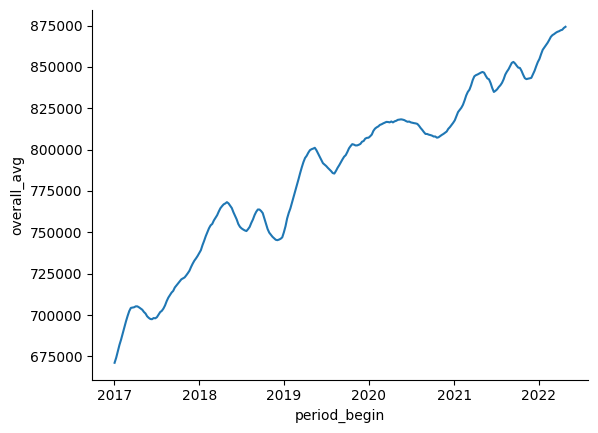

In [4]:
sns.lineplot(
    data=ca_housing_pivot,
    x=ca_housing_pivot.index,
    y="overall_avg"
)

sns.despine()

C:\Users\matwa\AppData\Local\Temp\ipykernel_16200\179980261.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


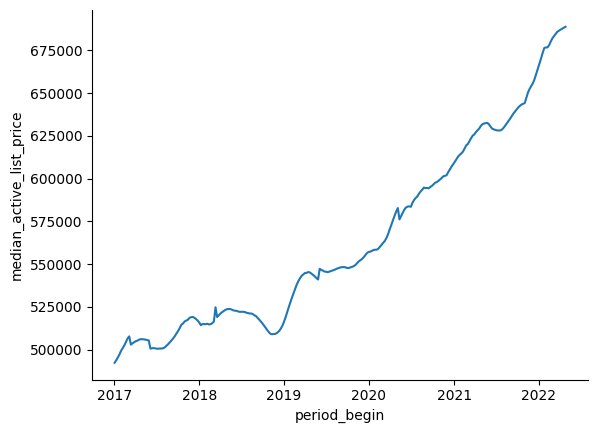

In [5]:
sns.lineplot(
    x="period_begin",
    y="median_active_list_price",
    data=ca_housing,
    ci=None  # By default: A 95% Confidence Interval will be plotted (2 STDs away from the mean)
    # estimator=min
)

sns.despine()

C:\Users\matwa\AppData\Local\Temp\ipykernel_16200\587040275.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


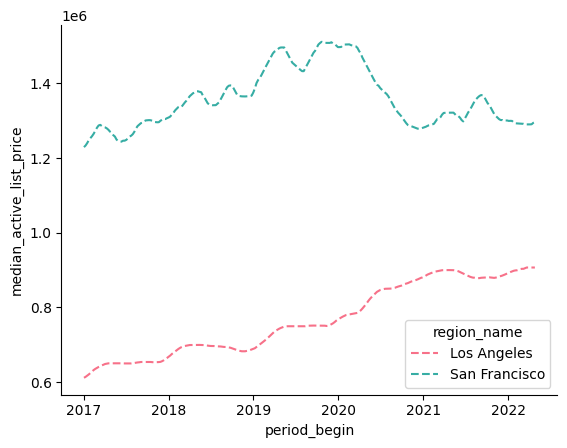

In [6]:
sns.lineplot(
    x="period_begin",
    y="median_active_list_price",
    data=ca_housing.query("region_name in ['Los Angeles', 'San Francisco']"),
    ci=None,
    hue="region_name",  # The hue argument will split the line chart into groups
    palette="husl",     # By setting the palette argument one can easily change the color palette
    ls="--"
)

sns.despine()

# Bar Charts

In [7]:
diamonds = pd.read_csv("Data/Diamonds Prices2022.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


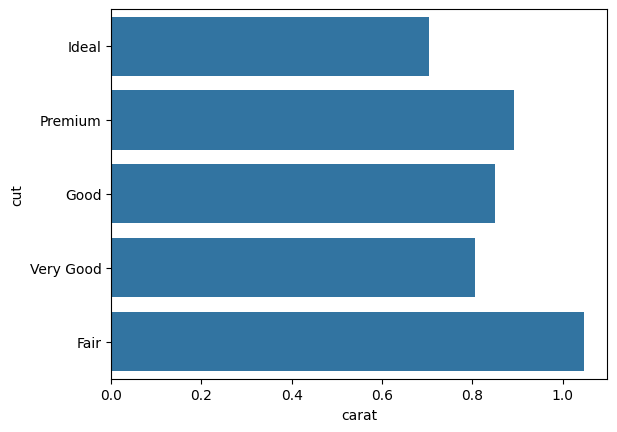

In [8]:
sns.barplot(
    x="carat",
    y="cut",
    data=diamonds,
    errorbar=None
);

<Axes: xlabel='price', ylabel='cut'>

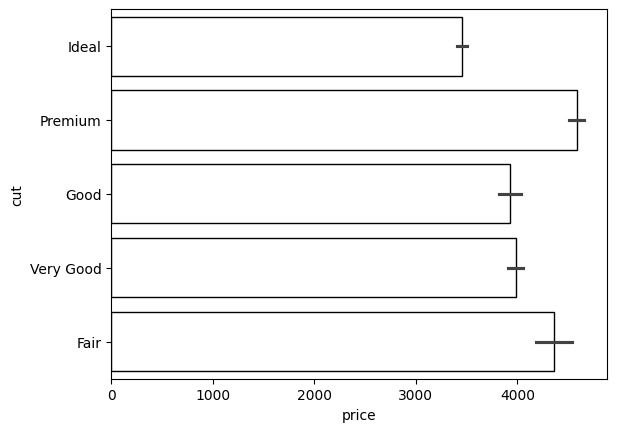

In [9]:
sns.barplot(
    x="price",
    y="cut",
    data=diamonds,
    facecolor="white",
    edgecolor="black"
)

### Grouped Bar Chart

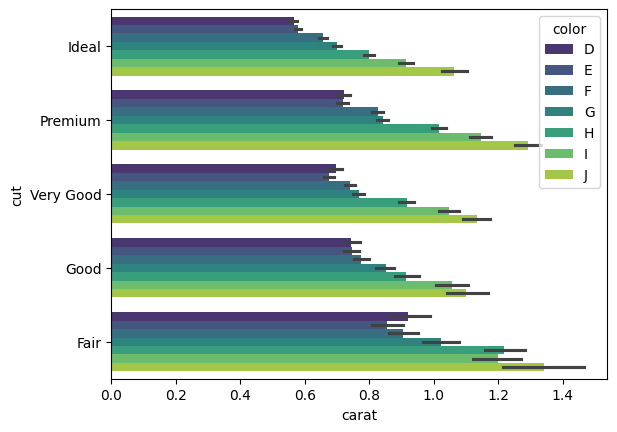

In [10]:
sns.barplot(
    x="carat",
    y="cut",
    hue="color",
    data=diamonds.sort_values(by="color"),
    palette="viridis"
);

It's possible to mix Matplotlib and Seaborn

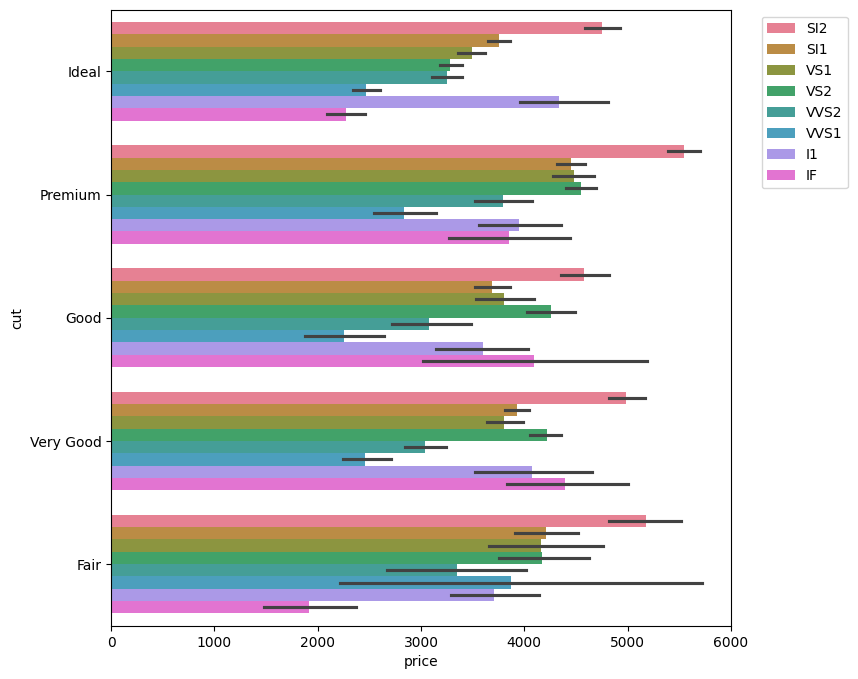

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

sns.barplot(
    x="price",
    y="cut",
    hue="clarity",
    data=diamonds,
    palette="husl"
)

ax.legend(bbox_to_anchor=(1.2, 1))

plt.show()

### Histograms

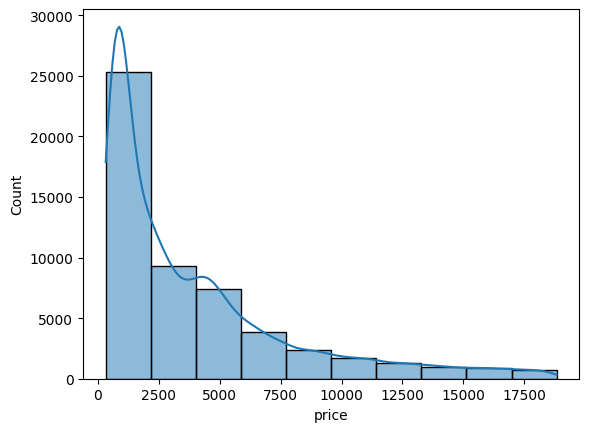

In [12]:
sns.histplot(
    x="price",
    data=diamonds,
    bins=10,
    kde=True        # Estimates density curve of the data
);

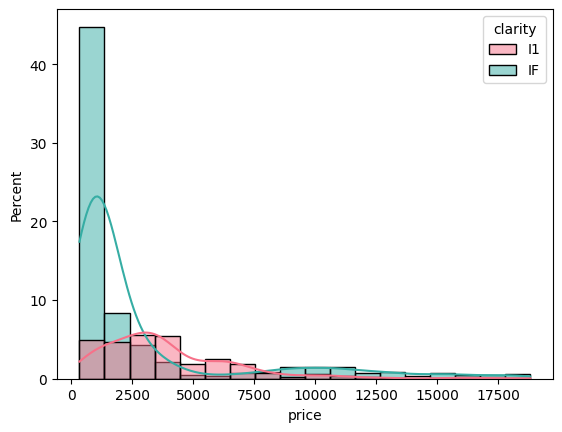

In [13]:
sns.histplot(
    x="price",
    hue="clarity",
    data=diamonds.query("clarity in ['I1', 'IF']"),
    palette="husl",
    stat="percent",
    # bins=10,
    binwidth=1000,
    kde=True
);

<Axes: xlabel='price', ylabel='clarity'>

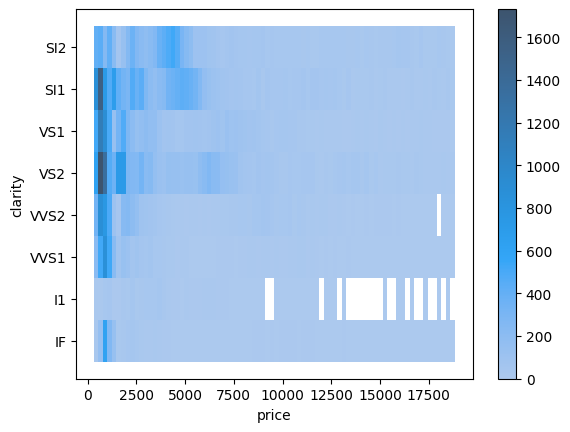

In [14]:
sns.histplot(
    x="price",
    y="clarity",
    data=diamonds,
    cbar=True
)

### Boxplot

<Axes: xlabel='price'>

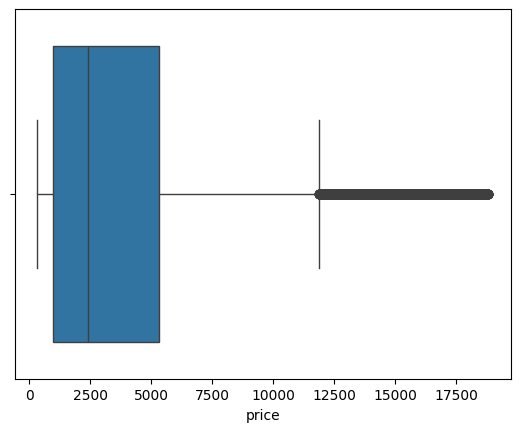

In [15]:
sns.boxplot(
    x="price",
    data=diamonds
)

C:\Users\matwa\AppData\Local\Temp\ipykernel_16200\4079656462.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='cut', ylabel='price'>

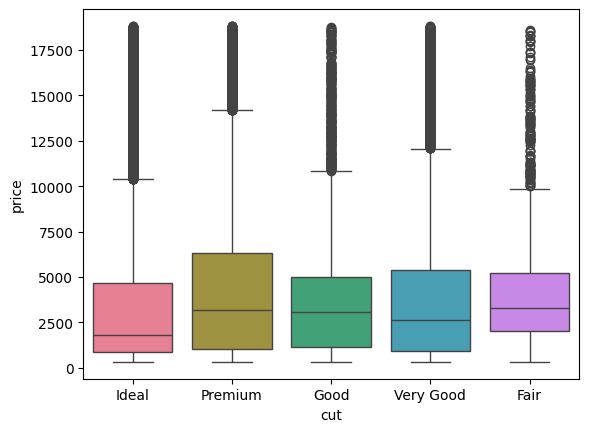

In [16]:
sns.boxplot(
    x="cut",
    y="price",
    data=diamonds,
    palette="husl"
)

### Violin plots

<Axes: ylabel='price'>

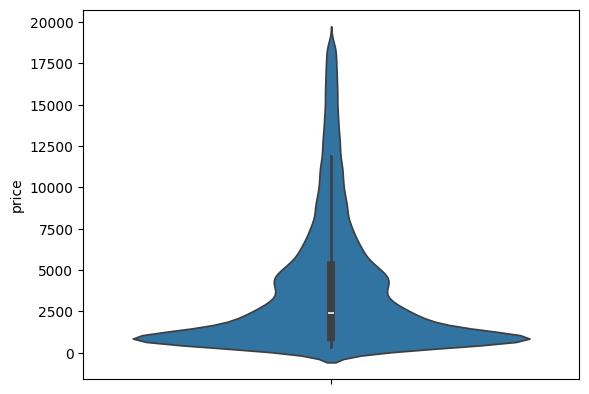

In [17]:
sns.violinplot(
    data=diamonds,
    y="price"
)

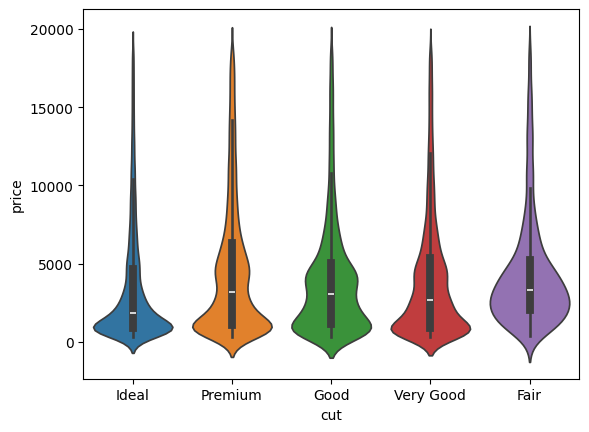

In [18]:
sns.violinplot(
    data=diamonds,
    x="cut",
    y="price",
    hue="cut",
    palette="tab10"
);

### Linear Relationship Plots

Regplot := Scatterplot with a fitted regression line

<Axes: xlabel='carat', ylabel='price'>

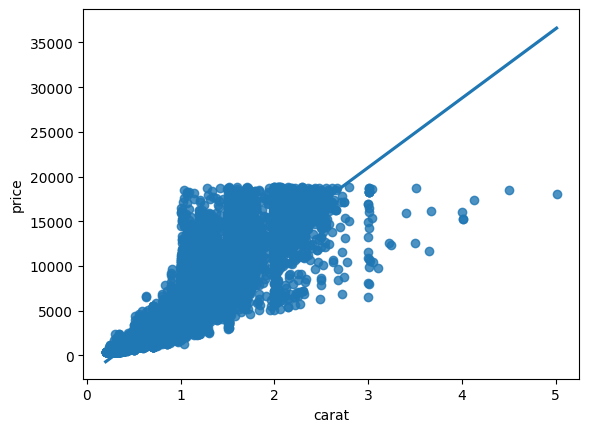

In [19]:
sns.regplot(
    data=diamonds,
    x="carat",
    y="price"
)

lmplot is an extension of Regplot that lets you explore the impact of other variables on the relationship

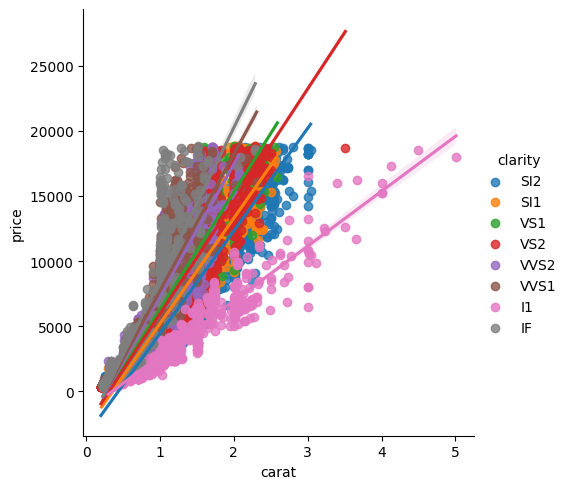

In [20]:
sns.lmplot(
    data=diamonds,
    x="carat",
    y="price",
    hue="clarity"
)

It's also possible to explore the impact of other variables on the relationship by creating regression plots for each combination of variables

Pro Tip: This capability should only be used for data analysis and not for presentation to an audience

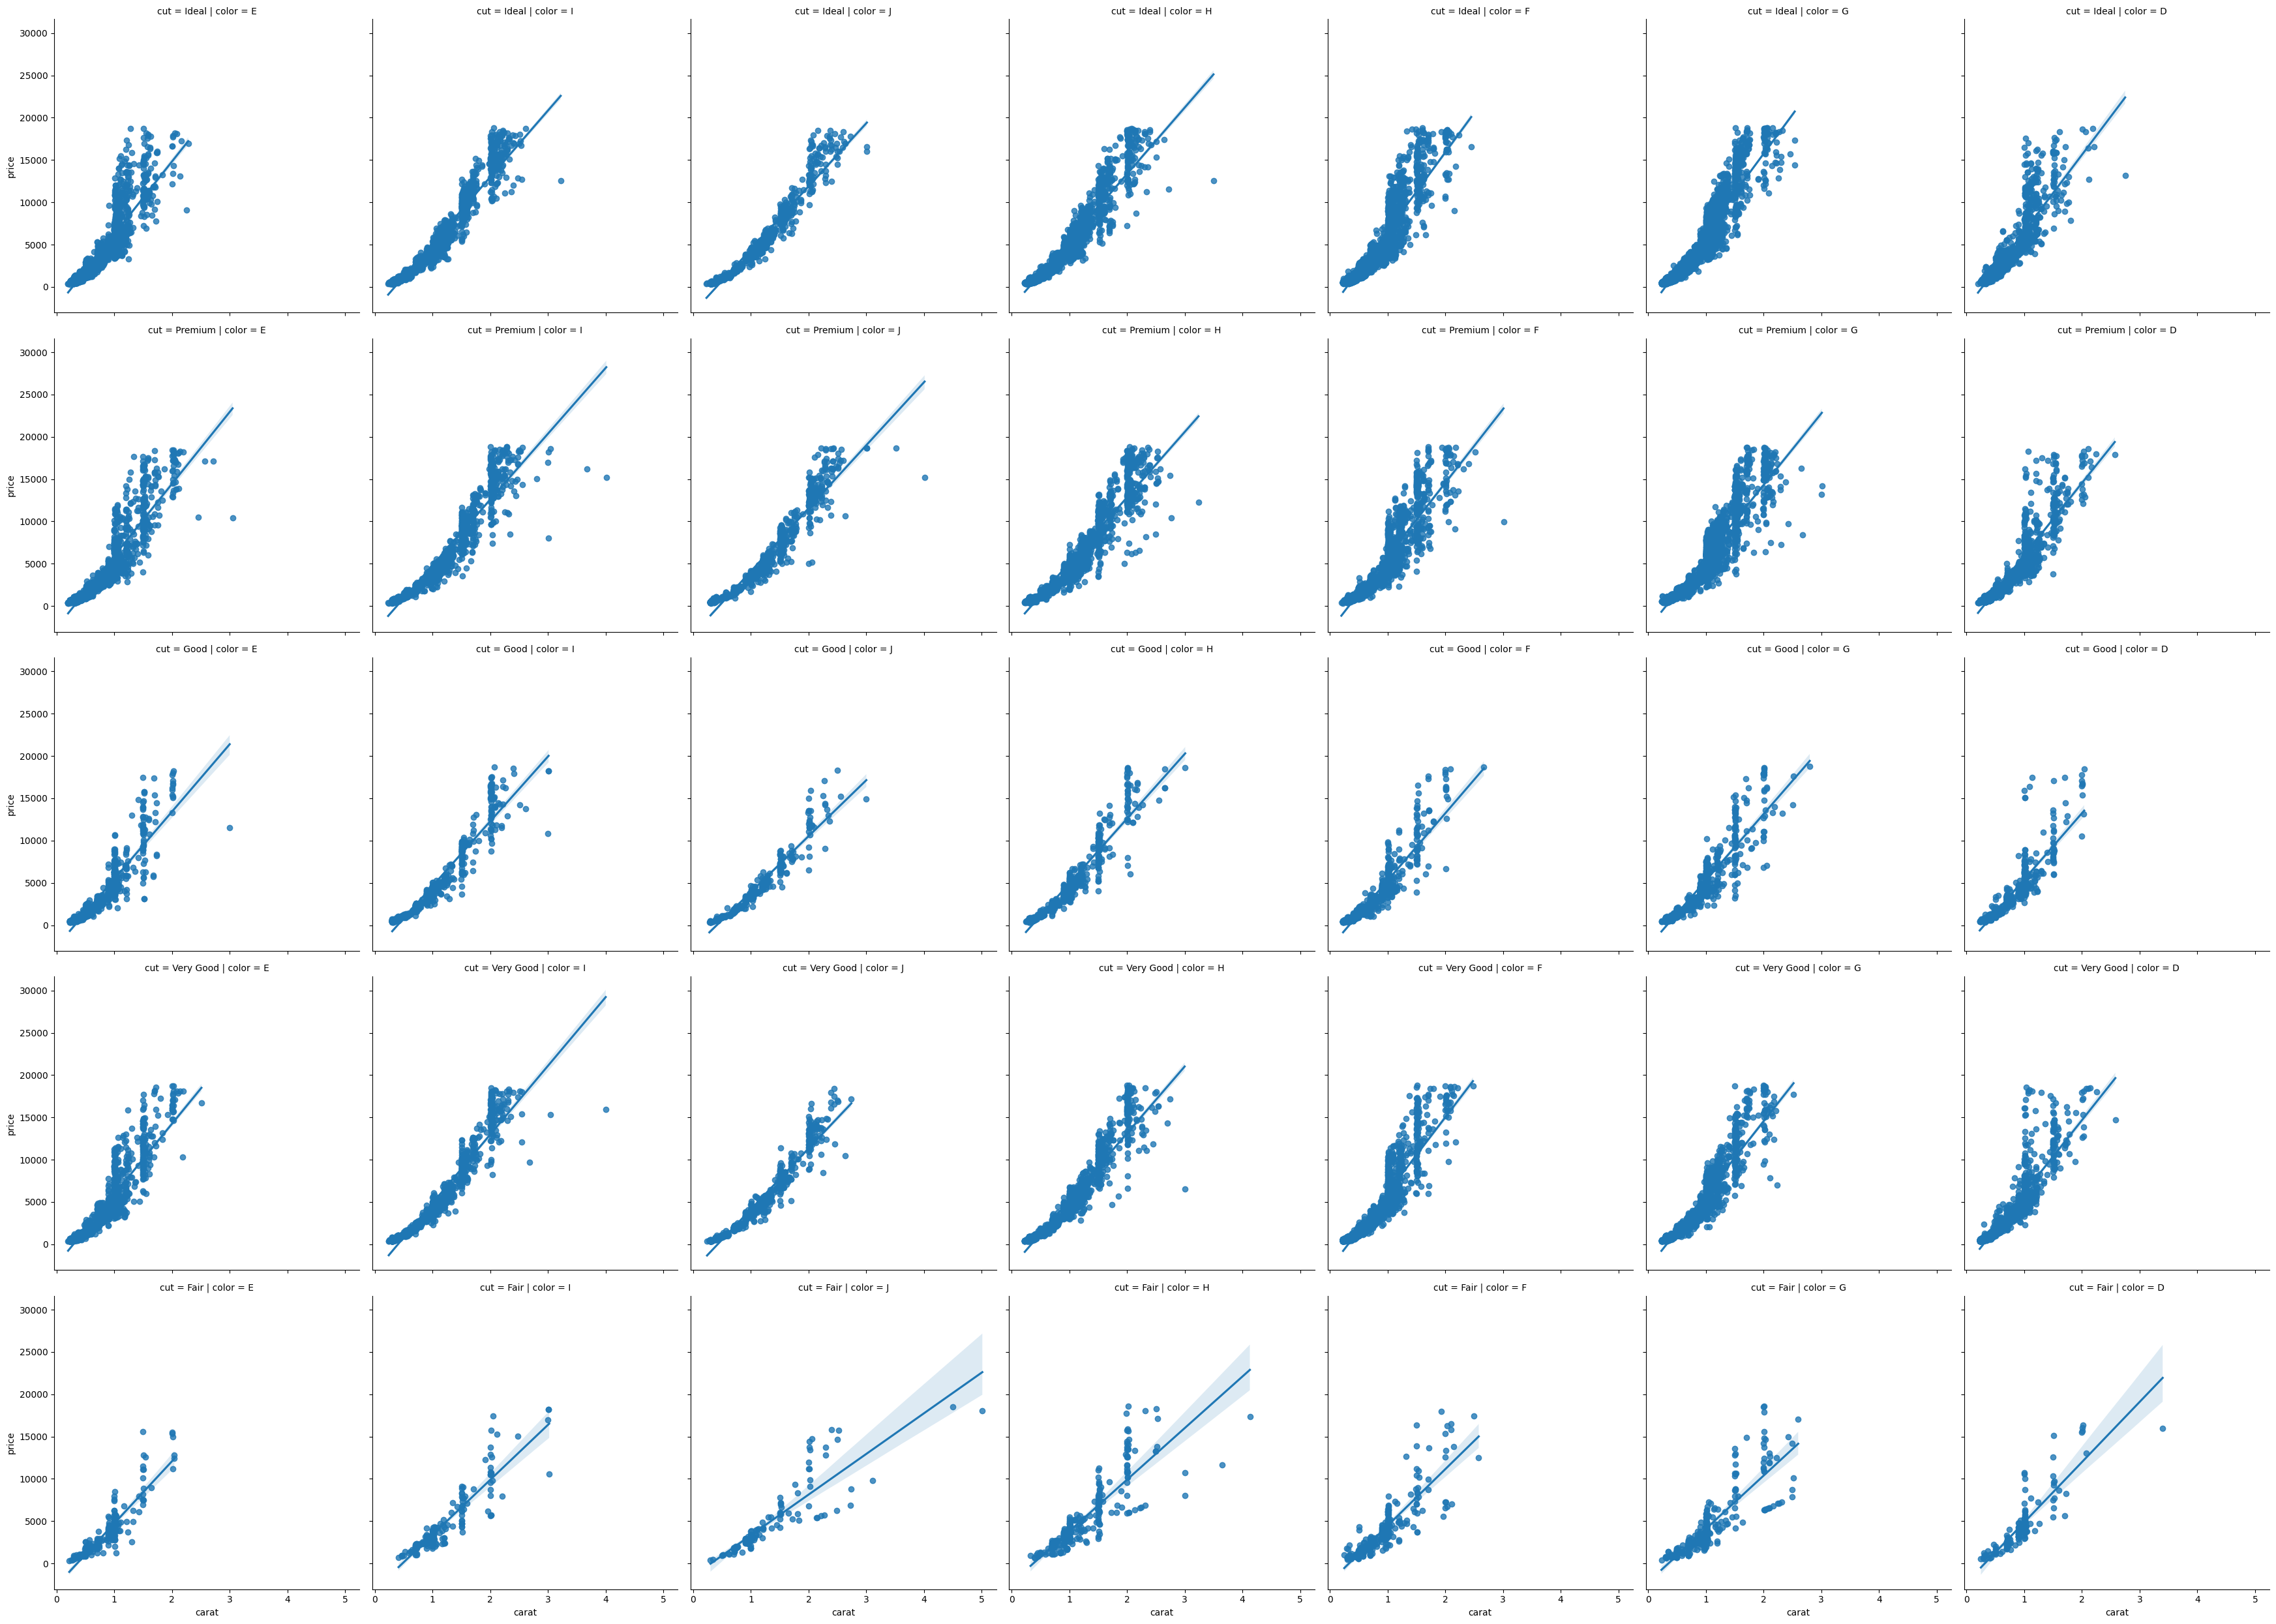

In [21]:
sns.lmplot(
    data=diamonds,
    x="carat",
    y="price",
    row="cut",
    col="color"
)

In [22]:
# You can get the regression line by using the stats module of the scipy library

import scipy.stats as stats

stats.linregress(diamonds["carat"], diamonds["price"])

LinregressResult(slope=np.float64(7756.436159508023), intercept=np.float64(-2256.395047537997), rvalue=np.float64(0.9215912778016121), pvalue=np.float64(0.0), stderr=np.float64(14.066209043016105), intercept_stderr=np.float64(13.05485311211162))

Jointplot creates a scatterplot and adds the distribution of each variable

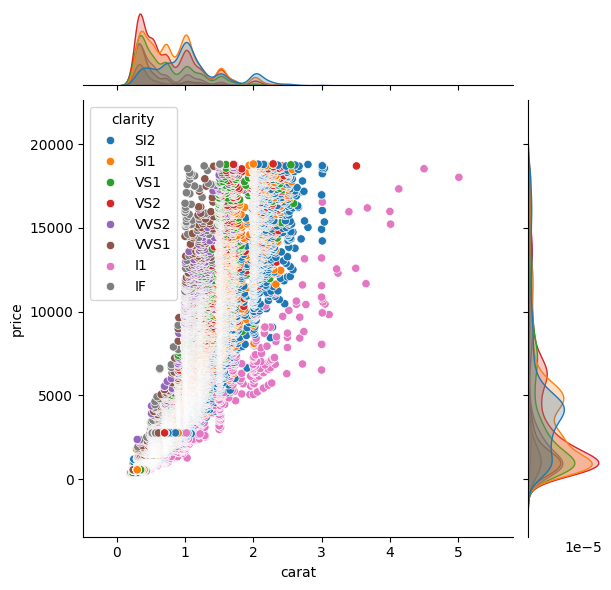

In [23]:
sns.jointplot(
    data=diamonds,
    x="carat",
    y="price",
    color="orange",
    kind="scatter",
    hue="clarity"
    # kind="kde" # To show KDE curves instead of histograms
)

Pairplot creates a matrix of scatterplots comparing multiple variables, and shows the distribution for each one along the diagonal

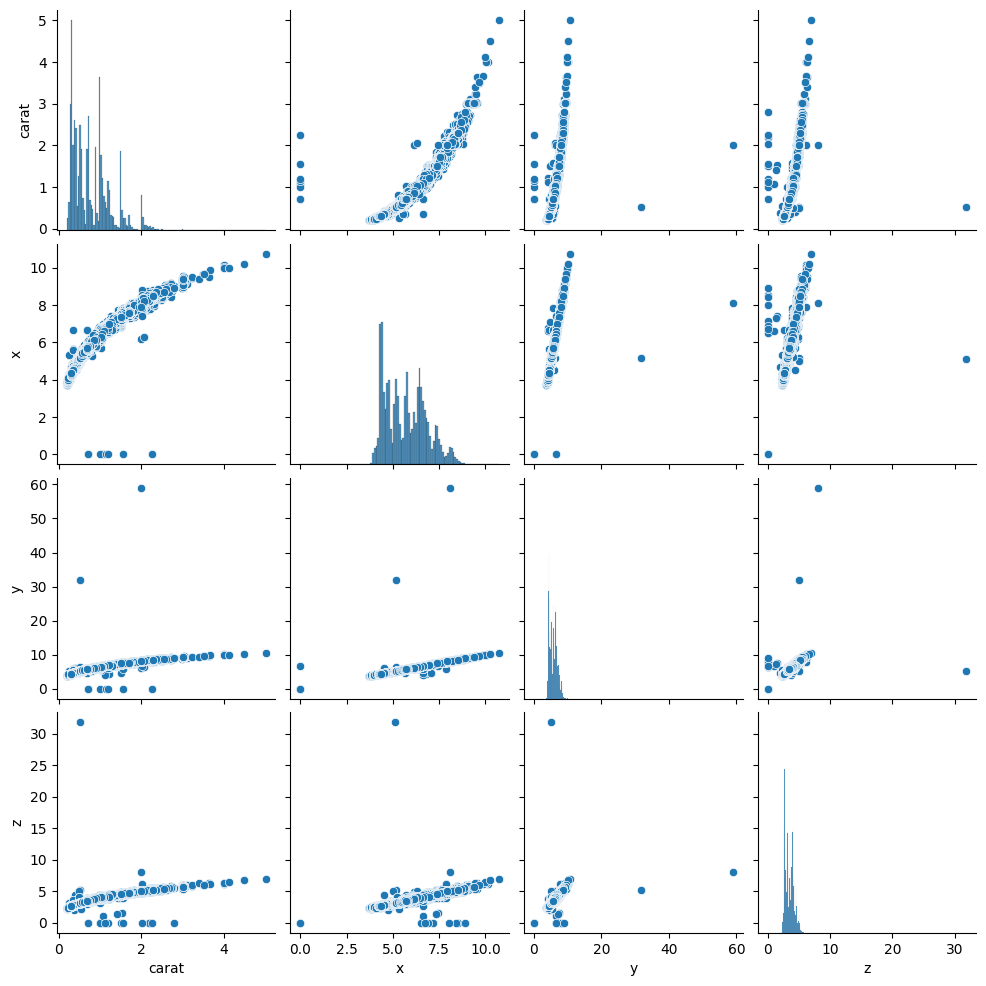

In [24]:
sns.pairplot(diamonds.loc[:, ["carat", "x", "y", "z"]])

In [25]:
# sns.pairplot(
#     diamonds.iloc[:, 1:],
#     hue="color",
#     corner=True         # Turns off corner and makes a diagonal matrix out of result to reduce redundancies
# )

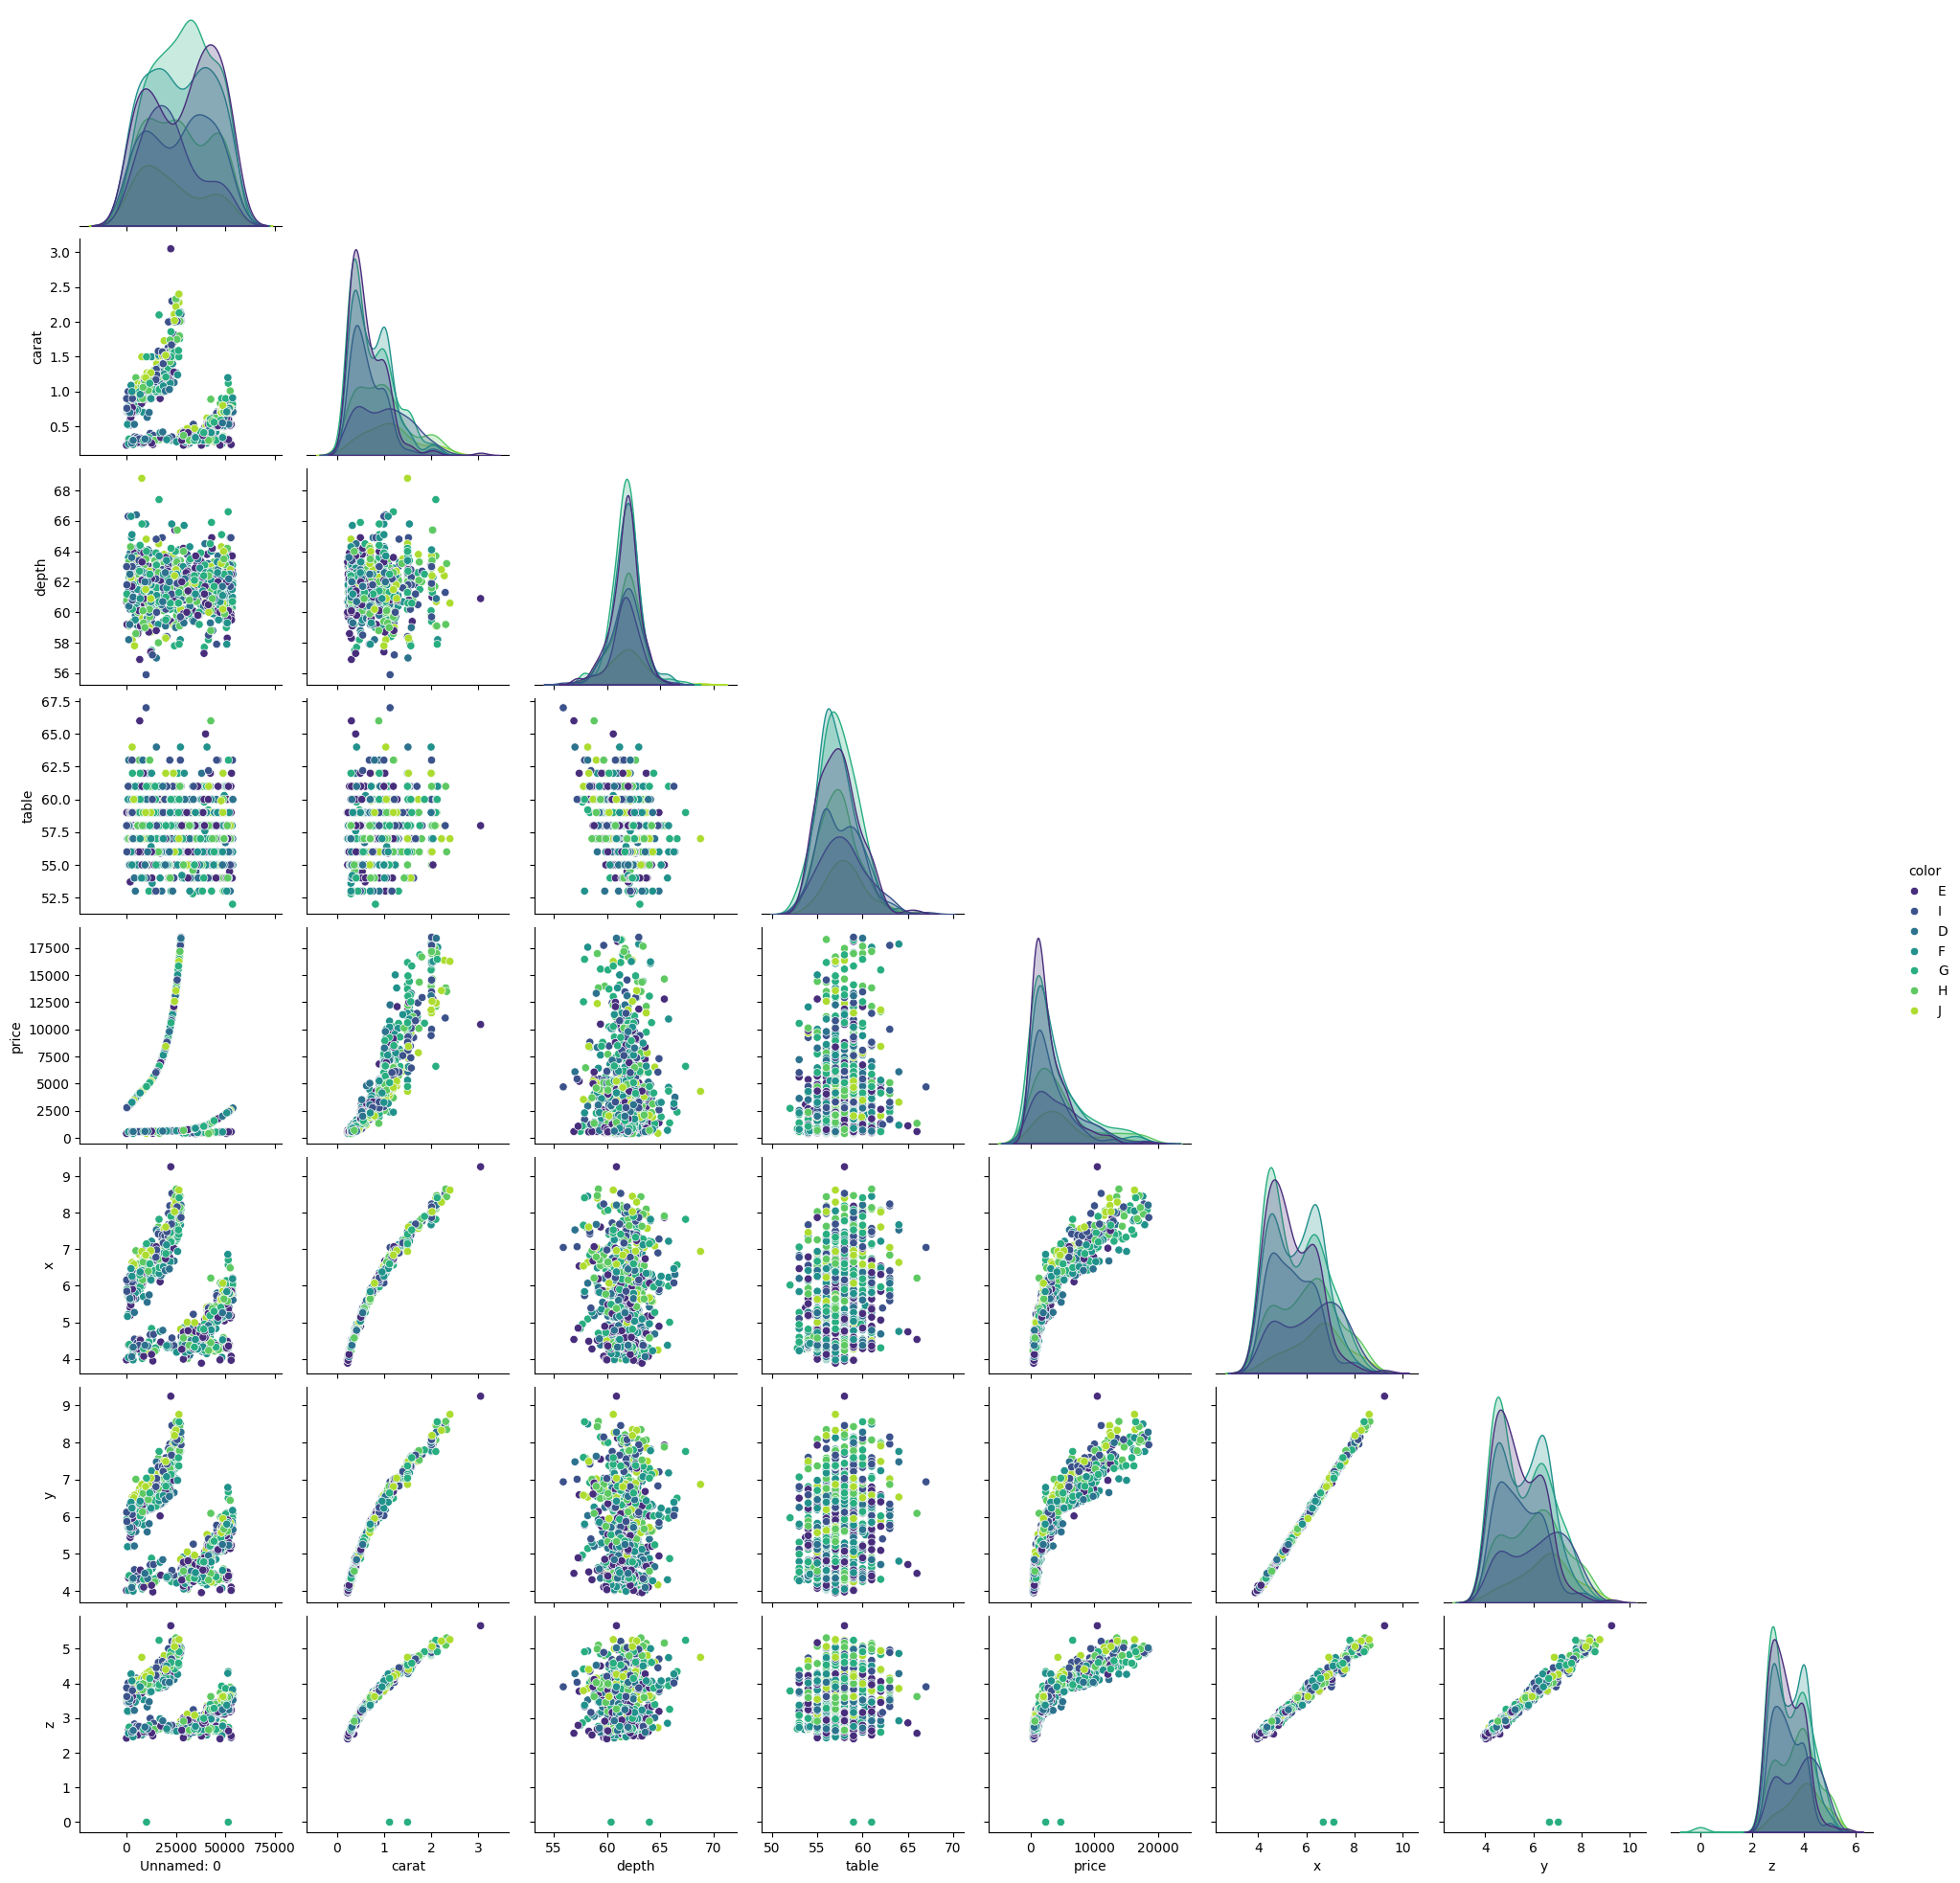

In [26]:
sns.pairplot(
    diamonds.sample(1000),          # Rerunning the cell above on a sample to reduce computing time
    hue="color",
    palette="viridis",
    corner=True
)

### Heatmaps

The pandas pivot_table method is a great way to set up the data needed for a heatmap

In [27]:
diamond_pivot = diamonds.pivot_table(
    index="cut",
    columns="color",
    values={"carat": "mean"}
)

<Axes: xlabel='color', ylabel='cut'>

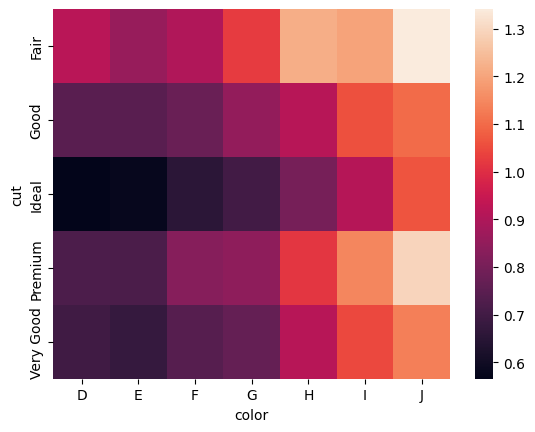

In [30]:
sns.heatmap(diamond_pivot.droplevel(0, axis=1)) # droplevel removes "carat-" before color

In [31]:
sns.heatmap(
    diamonds.corr(),
    annot=True,
    cmap="RdYlGn"
)

ValueError: could not convert string to float: 'Ideal'

### FacetGrid

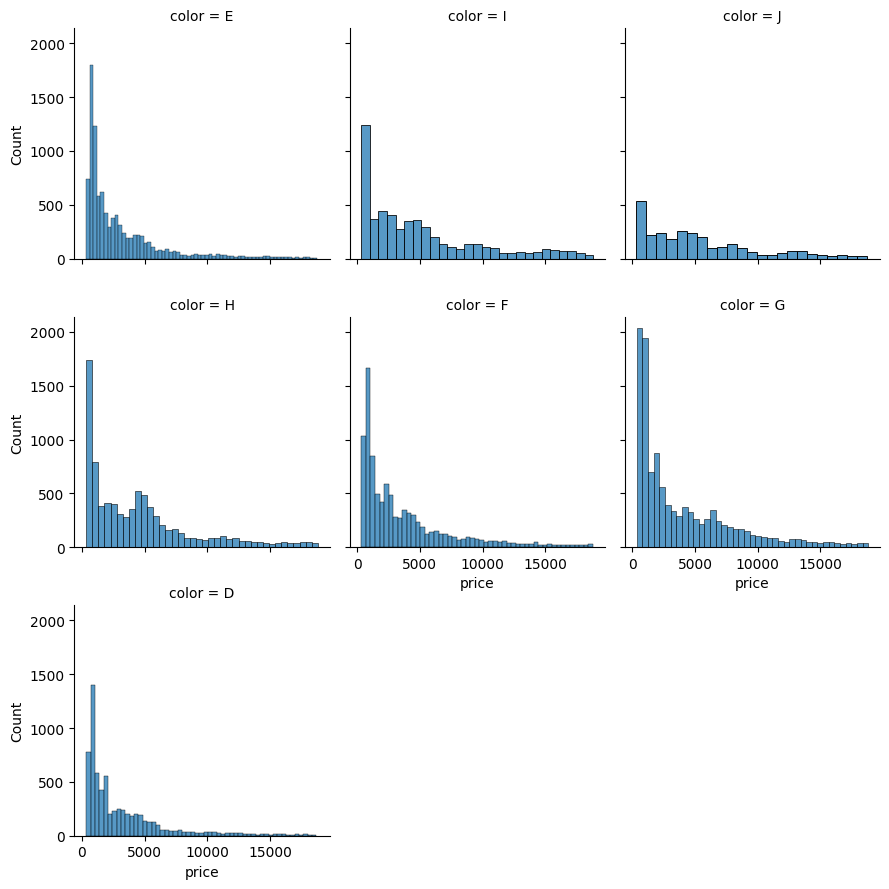

In [ ]:
g = sns.FacetGrid(
    diamonds,
    col="color",        # This creates 7 charts, 1 for each color
    col_wrap=3          # Creates a plot with 3 charts per row
)

g.map_dataframe(sns.histplot, x="price")

# Matplotlib Integration

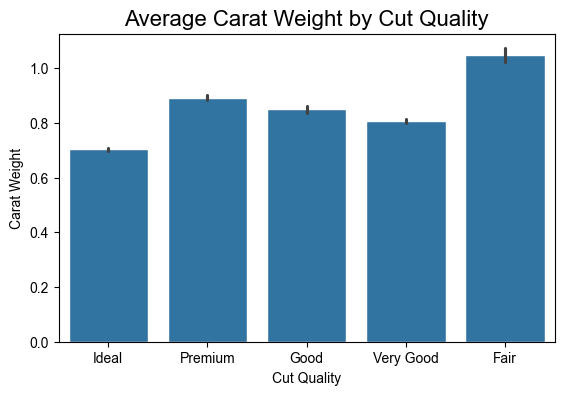

In [34]:
fig, ax = plt.subplots(figsize=(6.4, 4))

sns.set_style("darkgrid")

sns.barplot(
    data=diamonds,
    x="cut",
    y="carat"
)

ax.set_title("Average Carat Weight by Cut Quality", fontsize=16)
ax.set_xlabel("Cut Quality")
ax.set_ylabel("Carat Weight")

plt.show()